In [40]:
#Dependencies
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Store the file path associated with the file
csvpath = os.path.join('.', 'breweries.csv')
data_df = pd.read_csv(csvpath)

#Only grab the fields we need from the data frame
grab_fields_df = data_df[["name", "brewery_type", 'city', "state", 'country']]
grab_fields_df.describe()

#Rename our headers
renamed_df = grab_fields_df.rename(columns={"name":"Brewery Name", "brewery_type":"Type of Brewery",
                                    "city": "City", "state": "State", "country": "Country"})
renamed_df.head()

,Brewery Name,Type of Brewery,City,State,Country
0,10-56 Brewing Company,micro,Knox,Indiana,United States
1,10 Barrel Brewing Co,large,Bend,Oregon,United States
2,10 Barrel Brewing Co,large,Bend,Oregon,United States
3,10 Barrel Brewing Co - Bend Pub,large,Bend,Oregon,United States
4,10 Barrel Brewing Co - Boise,large,Boise,Idaho,United States


In [42]:
# I am only interested in open breweries so remove bars, restaurants, closed locations etc..
types_df = renamed_df.loc[(renamed_df["Type of Brewery"] == 'micro' )|
              (renamed_df["Type of Brewery"] == 'nano') |
              (renamed_df["Type of Brewery"] == 'contract')]

types_df.head()

,Brewery Name,Type of Brewery,City,State,Country
0,10-56 Brewing Company,micro,Knox,Indiana,United States
8,10 Torr Distilling and Brewing,micro,Reno,Nevada,United States
10,101 North Brewing Company,micro,Petaluma,California,United States
11,105 West Brewing Co,micro,Castle Rock,Colorado,United States
12,10K Brewing,micro,Anoka,Minnesota,United States


In [132]:
# Also going to remove Scotland breweries sice majority is for US
types_us_df = types_df.loc[types_df["Country"] == "United States"].reset_index(drop = True)

types_us_df.groupby("Type of Brewery").count() #Verify no missing data
len(types_us_df["State"].unique()) # Has a count of 52 expecting 51
types_us_df["State"].unique() # There is one instance where Missouri is spelt MIssouri

cleaned_df = types_us_df.replace({"MIssouri": "Missouri"})
len(cleaned_df["State"].unique()) #Resolved

51

In [133]:
#Create new Data Frame using dummies (Thanks Bill) so each brewery type has its own column for plotting
dummy_df = pd.get_dummies(cleaned_df["Type of Brewery"], prefix = "Type")

#Merge with original data frame to plot by state
merged_df = pd.merge(cleaned_df, dummy_df, on=None, left_index = True, right_index = True)

In [140]:
#Finialize DF by grouping by state and aggregrate by the count for ech brewery type
merged_df[["State", "Type_nano", "Type_micro", "Type_contract"]]
renamed_merged_df = merged_df.rename(columns = {"Type_nano": "Nano",
                                                "Type_contract": "Contract", 
                                                "Type_micro": "Micro"})

plot_df = renamed_merged_df.groupby("State").sum()
plot_df

,Contract,Micro,Nano
State,,,
Alabama,1.0,32.0,0.0
Alaska,1.0,29.0,0.0
Arizona,4.0,58.0,0.0
Arkansas,1.0,22.0,0.0
California,31.0,489.0,0.0
Colorado,9.0,220.0,0.0
Connecticut,5.0,53.0,0.0
Delaware,0.0,10.0,0.0
District of Columbia,2.0,5.0,0.0


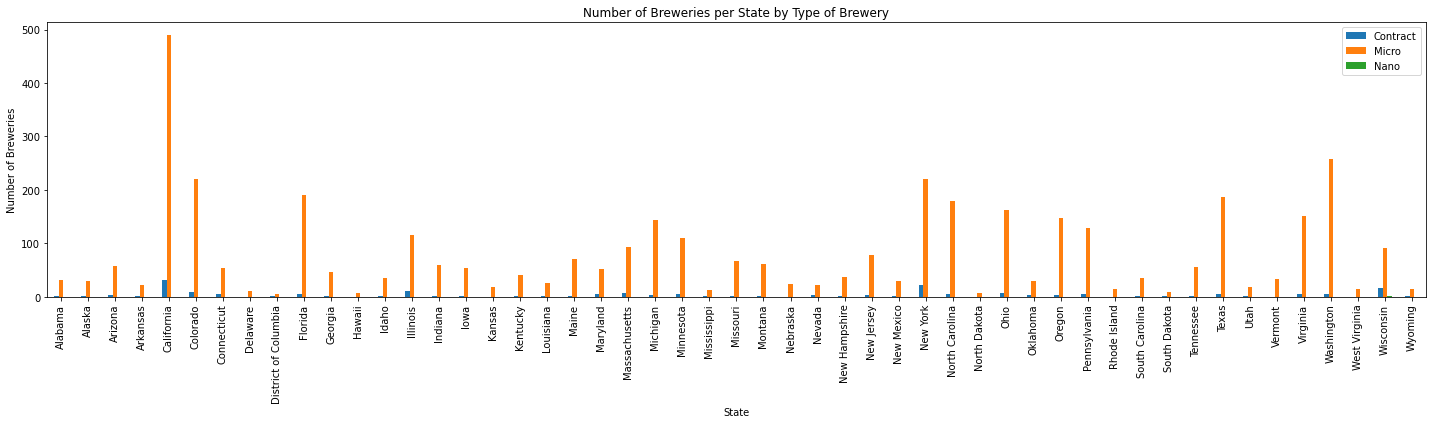

In [155]:
#Plot time
# Use DataFrame.plot() in order to create a bar chart of the data
plot_df.plot(kind="bar", figsize=(20,6))

# Set a title and axis labels for the chart
plt.title("Number of Breweries per State by Type of Brewery")
plt.ylabel("Number of Breweries")
plt.xlabel("State")
#plt.show()
plt.tight_layout()
plt.savefig("num_breweries_per_state_by_type.png")